In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import string

import re


# Download the nltk data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
# Define the URL to scrape
url = "https://en.wikipedia.org/wiki/Natural_language_processing"

# Fetch the content from the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stopwords set
stop_words = set(stopwords.words('english'))

# Function to clean and lemmatize text
def clean_text(text):
    #text = all(char in string.printable for char in text)
    #sentences = sent_tokenize(text)
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(lemmatized_tokens) # the text is kept as text

# Scrapping the webpage to include all HTML tags <p> and the text in them as seperate document in the corpus.
corpus = []
for paragraph in soup.find_all('p'):
    cleaned_text = clean_text(paragraph.text)
    if cleaned_text:  # Only add non-empty entries
        corpus.append(cleaned_text)

# Print each document in the corpus
for document in corpus:
    print(document)
    print("-----")
print(str(len(corpus)) + ' documents in corpus' )

Natural language processing NLP interdisciplinary subfield computer science artificial intelligence primarily concerned providing computer ability process data encoded natural language thus closely related information retrieval knowledge representation computational linguistics subfield linguistics Typically data collected text corpus using either statistical approach machine learning deep learning
-----
Major task natural language processing speech recognition text classification understanding generation
-----
Natural language processing root Already Alan Turing published article titled Computing Machinery Intelligence proposed called Turing test criterion intelligence though time articulated problem separate artificial intelligence proposed test includes task involves automated interpretation generation natural language
-----
premise symbolic NLP John Searle Chinese room experiment Given collection rule Chinese phrasebook question matching answer computer emulates natural language un

# BOW

Bag of words model is used in NLP as a mean for text representation. The model first counts all the unique words in the corpus, and assign an index to each. Then, the model creates a fixed lenght vector, where each entery represents a word, and the value in that entery is the number of appearences of the word in the document.

Its pretty simple approach for text encoding, althought its main disadvantage is lack of context and order of words in the representation.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)
print(str(X.shape)+ ' the dimentions of corpus')

print('\nUnique Words and their possition in the vector:')
print(vectorizer.vocabulary_)

print('\n Array representation of corpus BOW')
print(X.toarray())


feature_names = vectorizer.get_feature_names_out()
print('\n All unique words, alphabeticlly sorted')
print(feature_names)


# Each row represents a document. Each column a unique word.
# The value is the BOW score
df = pd.DataFrame(X.toarray(), columns=feature_names)
df


(23, 345) the dimentions of corpus

Unique Words and their possition in the vector:
{'natural': 197, 'language': 159, 'processing': 235, 'nlp': 205, 'interdisciplinary': 148, 'subfield': 295, 'computer': 60, 'science': 266, 'artificial': 27, 'intelligence': 146, 'primarily': 230, 'concerned': 62, 'providing': 240, 'ability': 0, 'process': 234, 'data': 73, 'encoded': 95, 'closely': 47, 'related': 252, 'information': 144, 'retrieval': 260, 'knowledge': 157, 'representation': 254, 'computational': 59, 'linguistics': 171, 'typically': 328, 'collected': 52, 'text': 307, 'corpus': 69, 'using': 336, 'statistical': 287, 'approach': 23, 'machine': 176, 'learning': 166, 'deep': 75, 'major': 180, 'task': 300, 'speech': 285, 'recognition': 248, 'classification': 46, 'understanding': 331, 'generation': 120, 'root': 264, 'alan': 12, 'turing': 326, 'published': 243, 'article': 25, 'titled': 315, 'computing': 61, 'machinery': 177, 'proposed': 238, 'called': 39, 'test': 306, 'criterion': 72, 'time': 31

,ability,achieve,acl,acquiring,action,addressed,advance,advanced,advantage,age,...,used,using,various,went,widespread,winter,word,writing,year,yoshua
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,1
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF - IDF
TF-IDF is a statistical approach made for deciding the importance of each term in whole corpus. TF - term frequency calculated as the number of apperences of a term in a document / (devided) by the total number of terms in the document.

IDF - inverse document frequency, calclated as log fo total number of documents in corpus / devided by number of documents with specific term in it.

The TF-IDF is multiplication of the two. Appling this embedding technique will result in common words that appear in every document, to be less dominant then unique words that appear only once. Unlike BOW, this approach keeping the statistical distribution of words and also normalizes their impact on text. Very usefull for text summarization.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

print("Shape of TF-IDF Matrix:", X.shape)
print("Feature Names:", vectorizer.get_feature_names_out())

# Each row represents a document. Each column a unique word.
# The value is the TF-IDF score
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df

Shape of TF-IDF Matrix: (23, 345)
Feature Names: ['ability' 'achieve' 'acl' 'acquiring' 'action' 'addressed' 'advance'
 'advanced' 'advantage' 'age' 'ai' 'aid' 'alan' 'algorithm' 'alignment'
 'analyze' 'announced' 'answer' 'anymore' 'apparent' 'application'
 'applied' 'applying' 'approach' 'area' 'article' 'articulated'
 'artificial' 'aspect' 'automated' 'based' 'behaviour' 'bengio' 'best'
 'branch' 'british' 'brno' 'broadly' 'build' 'called' 'capture' 'care'
 'category' 'caused' 'chinese' 'chomskyan' 'classification' 'closely'
 'cluster' 'coarse' 'cognition' 'cognitive' 'collected' 'collection'
 'college' 'combining' 'commonly' 'complex' 'comprehension'
 'computational' 'computer' 'computing' 'concerned' 'conference'
 'confronts' 'conll' 'construction' 'context' 'convenience' 'corpus'
 'coupled' 'cpu' 'criterion' 'data' 'decision' 'deep' 'defining'
 'dependency' 'develop' 'development' 'developmental' 'devising'
 'dictionary' 'direct' 'direction' 'discouraged' 'division' 'dominance'
 

,ability,achieve,acl,acquiring,action,addressed,advance,advanced,advantage,age,...,used,using,various,went,widespread,winter,word,writing,year,yoshua
0,0.163997,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.131378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.510276,0.000000,0.000000,0.212323
6,0.000000,0.109746,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.124196,0.124196,0.000000,0.000000,0.000000,0.124196,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.187027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233463,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.369584,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.43264,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Word2Vec

Embedding techniqu to transform words into an array of numbers. Generally done by 2 approaches:

 CBOW - continues bag of words, predicting the current word based on its context.

Skip-Gram - predicts the context from the word.

gensim supports both, and in this specific case there was no difference between the two.

genism requires a list of tokens unlike the previous embeddings.

In [27]:
join_corpus = []
for document in corpus:
    lst = word_tokenize(document)
    join_corpus.append(lst)

# Print each document in the corpus
for document in join_corpus:
    print(document)
    print("-----")
print(str(len(join_corpus)) + ' documents in corpus' )

['Natural', 'language', 'processing', 'NLP', 'interdisciplinary', 'subfield', 'computer', 'science', 'artificial', 'intelligence', 'primarily', 'concerned', 'providing', 'computer', 'ability', 'process', 'data', 'encoded', 'natural', 'language', 'thus', 'closely', 'related', 'information', 'retrieval', 'knowledge', 'representation', 'computational', 'linguistics', 'subfield', 'linguistics', 'Typically', 'data', 'collected', 'text', 'corpus', 'using', 'either', 'statistical', 'approach', 'machine', 'learning', 'deep', 'learning']
-----
['Major', 'task', 'natural', 'language', 'processing', 'speech', 'recognition', 'text', 'classification', 'understanding', 'generation']
-----
['Natural', 'language', 'processing', 'root', 'Already', 'Alan', 'Turing', 'published', 'article', 'titled', 'Computing', 'Machinery', 'Intelligence', 'proposed', 'called', 'Turing', 'test', 'criterion', 'intelligence', 'though', 'time', 'articulated', 'problem', 'separate', 'artificial', 'intelligence', 'proposed'

After Playing with hyperparameters, ive concluded that vector size of 15 is enought to best encode the words in corpus, in order to find the closes similarity for 'NLP' in text.

In [92]:
from gensim.models import Word2Vec

# Train the Word2Vec model
model = Word2Vec(join_corpus, vector_size=15, window=3, min_count=1, workers=3, sg=0) # no significal difference between CBOW and Skip-Gram

# Save the model
model.save("word2vec.model")

In [93]:
print('Embedding of the word: NLP')
print(model.wv['NLP'])

# Find most similar words
print('\nSimilar words to NLP')
print(model.wv.most_similar('NLP'))

Embedding of the word: NLP
[-0.01302901  0.01900546  0.00798433 -0.05585486 -0.06252143  0.04841015
  0.03303816  0.04567081  0.00555917  0.04268309 -0.02191326 -0.00589241
  0.03898136 -0.0504747  -0.02699334]

Similar words to NLP
[('set', 0.7596735954284668), ('speaking', 0.6990012526512146), ('data', 0.6945409774780273), ('several', 0.651439905166626), ('general', 0.6449953317642212), ('trained', 0.6374852061271667), ('Shared', 0.62177574634552), ('mental', 0.6183019280433655), ('although', 0.5830580592155457), ('Cognitive', 0.5764226913452148)]


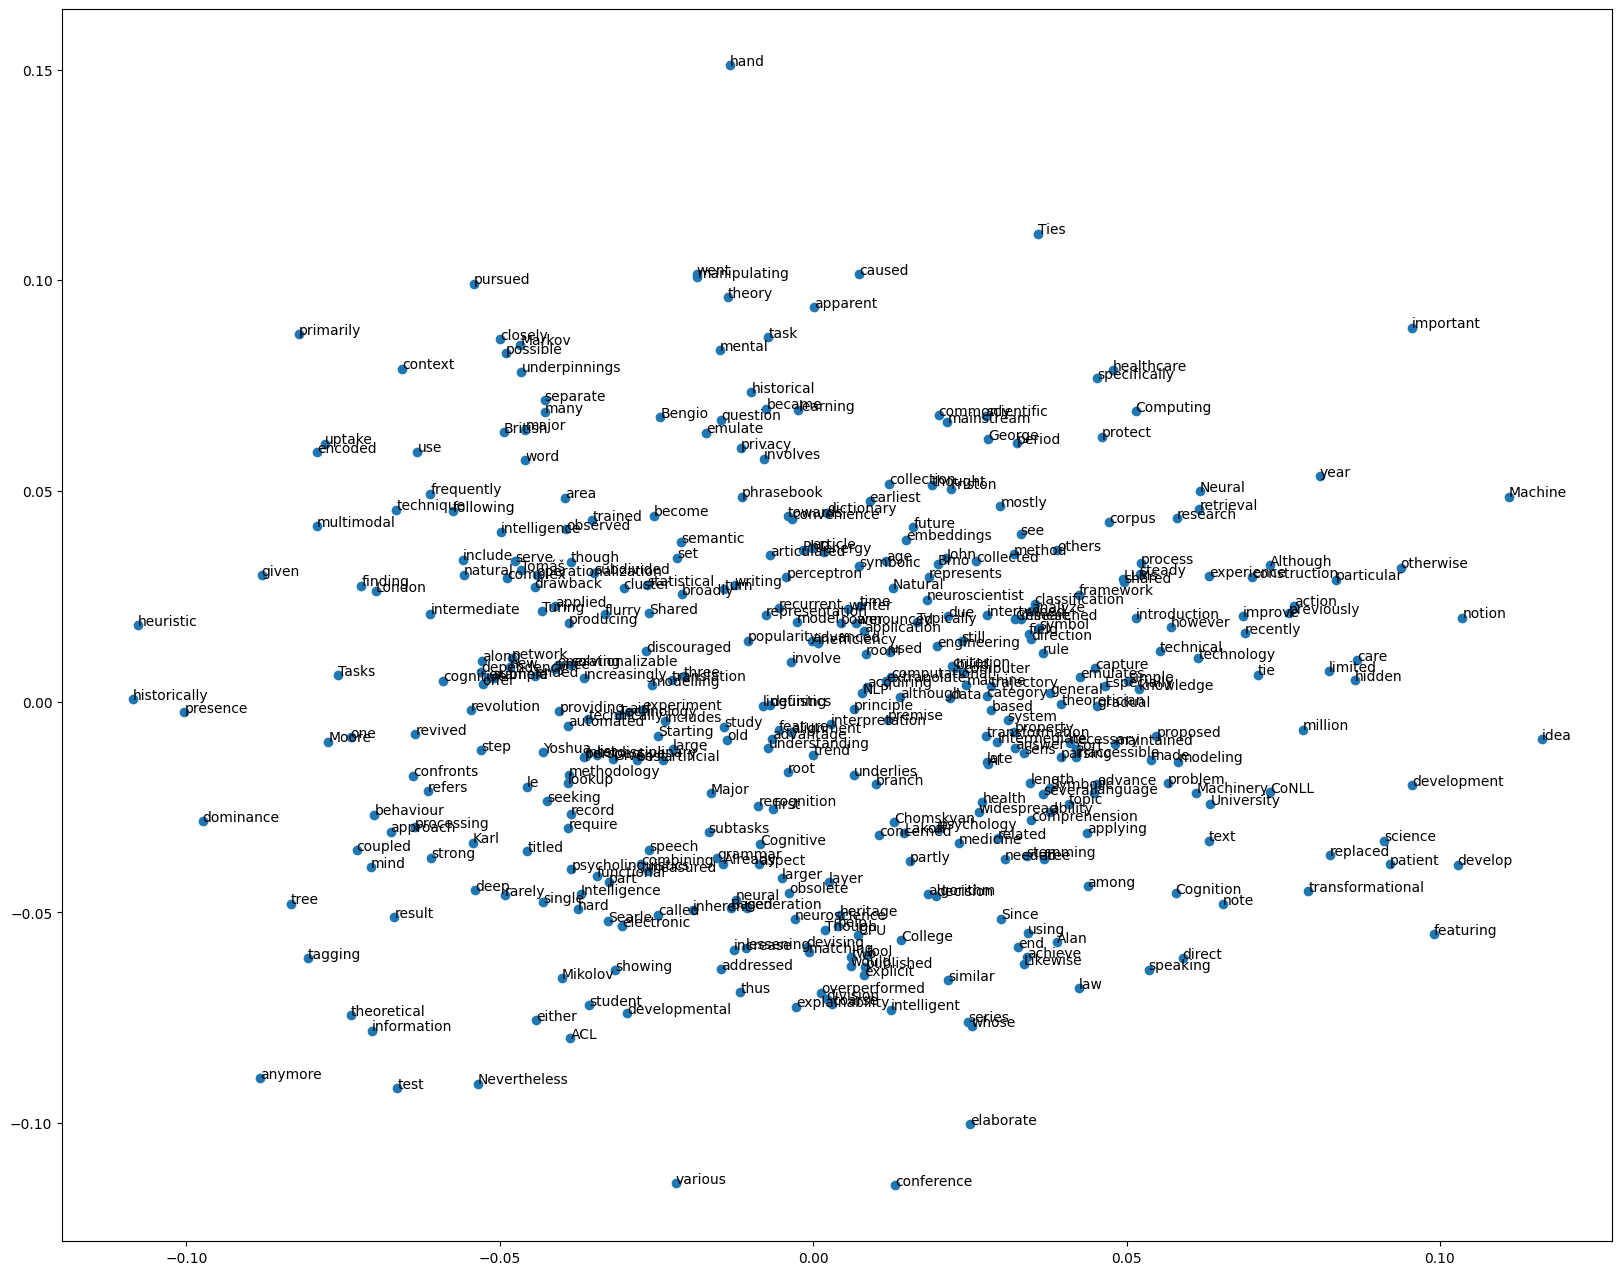

In [94]:
# bonus
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(20, 16))
# Fit a 2d PCA model to the vectors
X = model.wv[model.wv.key_to_index]  # Get all vectors from the model
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index.keys())
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# There is a consideration for PCA error and reduction, but we can see
# that words like 'Neural', 'reasurch', and 'corpus' are pretty close one to another.

# GloVe

is essentially an embeddint technique combining context-based approaches like word2vec with fatored matrix of accurances. In Glove a co-ocurance matrix is created where each entery [i,j] is the amount of times the word i apreared in context of word j. this process captures the probabilities that two words will appear together, helping the model learn relationships and patterns in the data based on overall statistics across the text, rather than from local context-window methods alone. This process helps capturing meaningfull differences between words and their semantic similarits, allowing to calculate the famous example of "king" - "man" + "woman" = "queen"

In [76]:
import gensim.downloader as api

# Load the GloVe model
model = api.load("glove-wiki-gigaword-100")  # loads the GloVe model, dim=100



In [78]:
import numpy as np

# Function to get vector for a word
def get_word_vector(word, model):
    try:
        return model[word]
    except KeyError:
        return np.zeros(model.vector_size)  # Return zero vector if word not in vocabulary

# Apply vectors to your corpus
vectorized_corpus = [[get_word_vector(word, model) for word in sentence] for sentence in corpus]

In [83]:
sentence_vectors = [np.mean(sentence, axis=0) for sentence in vectorized_corpus if len(sentence) > 0]
print(len(sentence_vectors))
sentence_vectors
# Basicly every vector is embedded representation of each document in corpus

23


[array([-0.32136671,  0.35299804,  0.11206752, -0.1071607 , -0.31510362,
         0.12273644,  0.22444747,  0.16526603, -0.39041579,  0.16066506,
         0.54332389, -0.41066688, -0.40051105,  0.31909173,  0.00650112,
        -0.17794433, -0.11012051,  0.01960185, -0.05563856,  0.17851516,
         0.50373521,  0.08215146,  0.05279775,  0.3532707 ,  0.09141636,
         0.51180841,  0.1850641 ,  0.03048505,  0.17385732, -0.20905089,
         0.34616066,  0.6844815 ,  0.04619316,  0.20217521,  0.33007532,
         0.21033214,  0.40700483,  0.26394509,  0.26839276,  0.28390385,
         0.22948541, -0.43636898, -0.01240905, -0.52029344, -0.18038579,
         0.17127574, -0.46875476,  0.02341513,  0.1001093 , -0.3345162 ,
        -0.00533379,  0.08769472,  0.34902343,  0.0340181 , -0.46918386,
        -1.6689417 , -0.12577319,  0.25755725,  1.17223108,  0.33884481,
        -0.34123366, -0.09120899, -0.58972851, -0.30252942,  0.71276307,
         0.42664332,  0.59115798,  0.50199168,  0.3

Cannot install glove, so no training

In [74]:
# !pip install glove-python-binary

ERROR: Could not find a version that satisfies the requirement glove-python-binary (from versions: none)
ERROR: No matching distribution found for glove-python-binary


In [ ]:
# from glove import Corpus, Glove

# # Create a corpus object
# corpus = Corpus()

# # Fit the corpus with your data (list of tokenized sentences)
# corpus.fit(join_corpus, window=10)

# # Create a GloVe object which will train the model
# glove = Glove(no_components=100, learning_rate=0.05)

# # Perform the training with a number of epochs
# glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)

# # Add the dictionary to the object to facilitate querying
# glove.add_dictionary(corpus.dictionary)

# # Save the model
# glove.save('my_glove_model.model')

# CYK - context free gremmar parsing

In [90]:
def cyk_parse(sentence, grammar):
    # Step 1: Tokenization
    tokens = sentence.split()
    n = len(tokens)
    table = [[set() for _ in range(n+1)] for _ in range(n+1)]

    # Step 2: Initialization
    for i in range(1, n+1):
        for rule in grammar:
            if rule[1] == tokens[i-1]:
                table[i][i].add(rule[0])

    # Step 3: Rule Application
    for length in range(2, n+1):
        for i in range(1, n-length+2):
            j = i + length - 1
            for k in range(i, j):
                for rule in grammar:
                    if len(rule) == 3:
                        for left in table[i][k]:
                            for right in table[k+1][j]:
                                if rule[1] in left and rule[2] in right:
                                    table[i][j].add(rule[0])

    # Step 4: Backtracking
    if 'S' in table[1][n]:
        return True, table
    else:
        return False, table


# Example usage:

# Define the context-free grammar in CNF
grammar = [
    ('S', 'NP', 'VP'),
    ('NP', 'Det', 'Noun'),
    ('VP', 'Verb', 'NP'),
    ('Det', 'the'),
    ('Det', 'a'),
    ('Noun', 'cat'),
    ('Noun', 'dog'),
    ('Verb', 'chased'),
    ('Verb', 'ate')
]
# Input sentence to be parsed
cyk_corpus = ["the cat chased a dog", "the dog chased a cat", "a cat chased the dog", "dog cat chased the a"]

# Iterate over each sentence in the corpus
for sentence in cyk_corpus:
  # Call the CYK parser
  parsed, table = cyk_parse(sentence, grammar)

  # Print the parse table and whether the sentence was parsed or not
  if parsed:
      print("Input sentence: ", sentence)
      print("Parse table: ")
      for row in table:
          print(row)
  else:
      print("Input sentence: ", sentence)
      print("Sentence not parsed.")

Input sentence:  the cat chased a dog
Parse table: 
[set(), set(), set(), set(), set(), set()]
[set(), {'Det'}, {'NP'}, set(), set(), {'S'}]
[set(), set(), {'Noun'}, set(), set(), set()]
[set(), set(), set(), {'Verb'}, set(), {'VP'}]
[set(), set(), set(), set(), {'Det'}, {'NP'}]
[set(), set(), set(), set(), set(), {'Noun'}]
Input sentence:  the dog chased a cat
Parse table: 
[set(), set(), set(), set(), set(), set()]
[set(), {'Det'}, {'NP'}, set(), set(), {'S'}]
[set(), set(), {'Noun'}, set(), set(), set()]
[set(), set(), set(), {'Verb'}, set(), {'VP'}]
[set(), set(), set(), set(), {'Det'}, {'NP'}]
[set(), set(), set(), set(), set(), {'Noun'}]
Input sentence:  a cat chased the dog
Parse table: 
[set(), set(), set(), set(), set(), set()]
[set(), {'Det'}, {'NP'}, set(), set(), {'S'}]
[set(), set(), {'Noun'}, set(), set(), set()]
[set(), set(), set(), {'Verb'}, set(), {'VP'}]
[set(), set(), set(), set(), {'Det'}, {'NP'}]
[set(), set(), set(), set(), set(), {'Noun'}]
Input sentence:  dog c